# Analysis of COVID cases in India 

### *a DataScience Project by Krishanu Podder*

### It’s the end of one quarter of the coronavirus disease (Covid-19) pandemic in India. Sure, the first cases in India, three people from Kerala who returned from Wuhan, China, the birthplace of the virus, date back to late January, but the number stayed at three for a long time. The next cases were recorded on March 2, making June 1 (Monday) the end of the first three months of the pandemic’s run in India.

### As of writing this, on 2nd June 2020, Tuesday, the beginning of the second, saw another milestone – India crossed 200,000 Covid-19 cases. The country ended Tuesday with 207,112 cases, of which 101,070 remain active. It is seventh in the list of countries in terms of number of cases. There have been 5,753 deaths so far and 100,289 have recovered.

### Let'slook at the current situation in India. We will take a look at the regions which are mostly affected by the outbreak and how numbers have steadily increased in India

In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%matplotlib notebook

In [2]:
# Loading Datasets

In [3]:
covid19_df = pd.read_csv("https://raw.githubusercontent.com/KrishanuPodder/COVID_Analysis_India/master/covid_19_india.csv")
individuals_df = pd.read_csv("https://raw.githubusercontent.com/KrishanuPodder/COVID_Analysis_India/master/IndividualDetails.csv")

In [4]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2589,2590,02/06/20,8:00 AM,Tripura,-,-,173,0,420
2590,2591,02/06/20,8:00 AM,Uttarakhand,-,-,222,6,958
2591,2592,02/06/20,8:00 AM,Uttar Pradesh,-,-,4843,217,8075
2592,2593,02/06/20,8:00 AM,West Bengal,-,-,2306,325,5772
2593,2594,02/06/20,8:00 AM,Cases being reassigned to states,-,-,0,0,6414


### we can see that the dataset provides a daywise record of the number of cases found in various part of the country. My home Tripura has 420 confirmed cases. The dataset has 9 features.

In [6]:
covid19_df.shape

(2594, 9)

### Let's see if there are missing values in the dataset

In [7]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

### Well there are no missing values in the dataset. Now I will try to see the latest records of each state in India.

In [8]:
covid19_df_latest = covid19_df[covid19_df['Date']=="02/06/20"]
covid19_df_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2558,2559,02/06/20,8:00 AM,Andaman and Nicobar Islands,-,-,33,0,33
2559,2560,02/06/20,8:00 AM,Andhra Pradesh,-,-,2378,64,3783
2560,2561,02/06/20,8:00 AM,Arunachal Pradesh,-,-,1,0,22
2561,2562,02/06/20,8:00 AM,Assam,-,-,277,4,1390
2562,2563,02/06/20,8:00 AM,Bihar,-,-,1900,24,3926


### What's the number of confirmed cases?

In [9]:
covid19_df_latest['Confirmed'].sum()

198706

### So, there are 198706 confirmed cases in India as on 2nd June 2020

## Now, lets visualise the data statewise

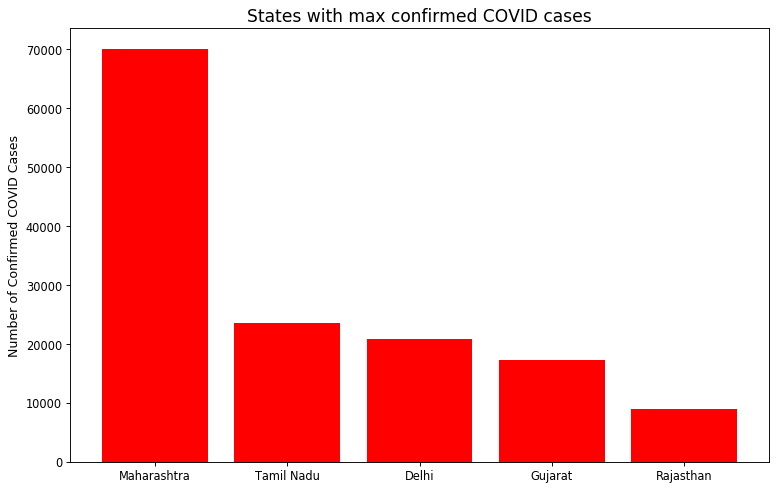

In [10]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(11,7), dpi=82)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Confirmed'][:5], align='center',color='red')
plt.ylabel('Number of Confirmed COVID Cases', size = 11)
plt.title('States with max confirmed COVID cases', size = 15)
plt.show()

### we can see that Maharashtra has the most number of cases as of now. Maharashtra is almost touching 70000 cases. No other state in India has crossed even half of Maharashtra. Gujarat and Delhi are about to touch 25000 

### What's the total number of deaths ?

In [11]:
covid19_df_latest['Deaths'].sum()

5598

### 5598 people have lost their life due to this pandemic. Sorry...

### which states have the most number of deaths?

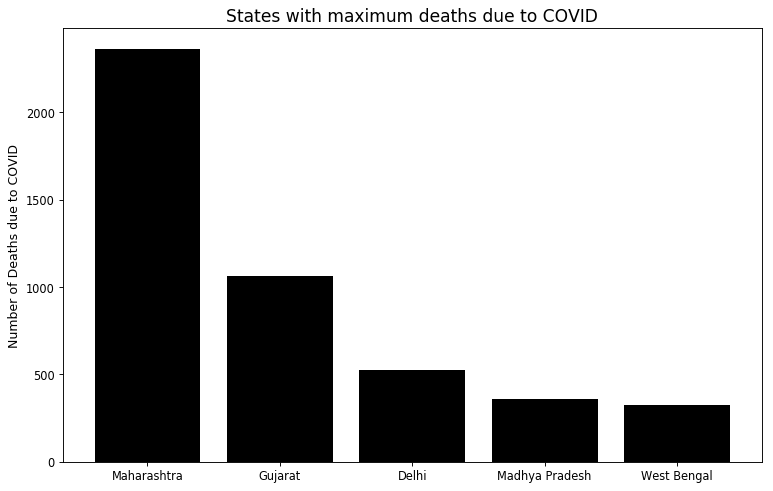

In [12]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(11,7), dpi=82)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Deaths'][:5], align='center',color='black')
plt.ylabel('Number of Deaths due to COVID', size = 11)
plt.title('States with maximum deaths due to COVID', size = 15)
plt.show()

### Maharashtra has almost 44% of the deaths in India due to COVID. Gujarat has almost the half of that of M'tra. Delhi has about 500  followed by Madhya Pradesh and west bengal.

### Now Let's look at the number of deaths per confirmed cases in different states
### This will give a better idea about the healthcare facilities available at various part of the country.

In [13]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(3)
covid19_df_latest['Deaths/Confirmed Cases'] = [np.nan if x == float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True, na_position='last')
covid19_df_latest.iloc[:5]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
2568,2569,02/06/20,8:00 AM,Gujarat,-,-,10780,1063,17200,16.181
2592,2593,02/06/20,8:00 AM,West Bengal,-,-,2306,325,5772,17.760
2576,2577,02/06/20,8:00 AM,Madhya Pradesh,-,-,5003,358,8283,23.137
2579,2580,02/06/20,8:00 AM,Meghalaya,-,-,12,1,27,27.000
2577,2578,02/06/20,8:00 AM,Maharashtra,-,-,30108,2362,70013,29.641


### Some States like Meghalaya, Mizoram have less number of cases and hardly any death, which shows that the situation is under control in those states as of now. But states like Maharashtra, west bengal are worstly affected and the condition seems to be out of control in Maharashtra, which is a matter of concern. 

### Now we will look into another dataset, which contains the individuial details

### Is there missing data in the individual details -dataset ?

In [14]:
individuals_df.isna().sum()

id                        0
government_id         25185
diagnosed_date            0
age                   25836
gender                22869
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                  1335
dtype: int64

### So, there are a number of missing data in this dataset which must be taken into consideration to move further with our analysis

### Where was the first case in India detected?

In [15]:
individuals_df.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
current_status                   Recovered
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

### The first case in India was detected on 30th January 2020 in Thrissur, Kerala. The individual had a travel history to Wuhan.

### grouping the individual data in terms of district where the cases were found

In [16]:
individuals_grouped_district = individuals_df.groupby('detected_district')
individuals_grouped_district = individuals_grouped_district['id']
individuals_grouped_district.columns = ['count']
individuals_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       3149
Ahmedabad    2181
Indore       1176
Jaipur        808
Pune          706
Name: id, dtype: int64

### Which gender group is the virus affecting more ?

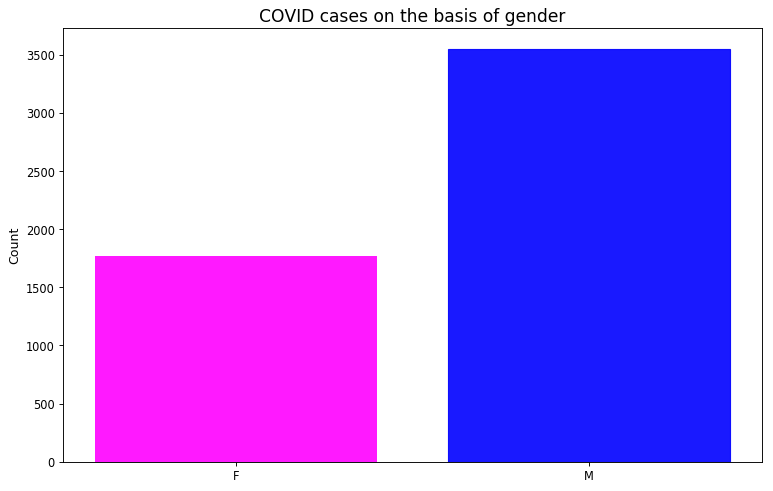

In [17]:
individuals_grouped_gender = individuals_df.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name = "count"))
individuals_grouped_gender.head()

plt.figure(figsize=(11,7), dpi=82)
barlist = plt.bar(individuals_grouped_gender['gender'], individuals_grouped_gender['count'], align = 'center', color='magenta', alpha=0.9)
barlist[1].set_color('blue')
plt.ylabel('Count', size=11)
plt.title('COVID cases on the basis of gender', size=15)
plt.show()

### Let's have a look at how the number of cases increased in India. Then we will visualize this curve and find similarities with the state-level curves.
### We will group the data on the basis of the diagnosed data feature so that we have a count of number of cases detected each day across India. we will do a cumulative sum of the feature and add it to a new column.

In [18]:
individuals_grouped_date = individuals_df.groupby('diagnosed_date')
individuals_grouped_date = pd.DataFrame(individuals_grouped_date.size().reset_index(name = "count"))
individuals_grouped_date[['Day','Month','Year']] = individuals_grouped_date.diagnosed_date.apply(lambda x: pd.Series(str(x).split("/")))
individuals_grouped_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date['Cumulative Count'] = individuals_grouped_date['count'].cumsum()
individuals_grouped_date = individuals_grouped_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)
individuals_grouped_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [19]:
individuals_grouped_date.tail()

,diagnosed_date,count,Cumulative Count
54,22/04/2020,1302,21503
55,23/04/2020,1701,23204
56,24/04/2020,1444,24648
57,25/04/2020,1883,26531
58,26/04/2020,1651,28182


### The individual data is available up to 26th April 2020 in the dataset

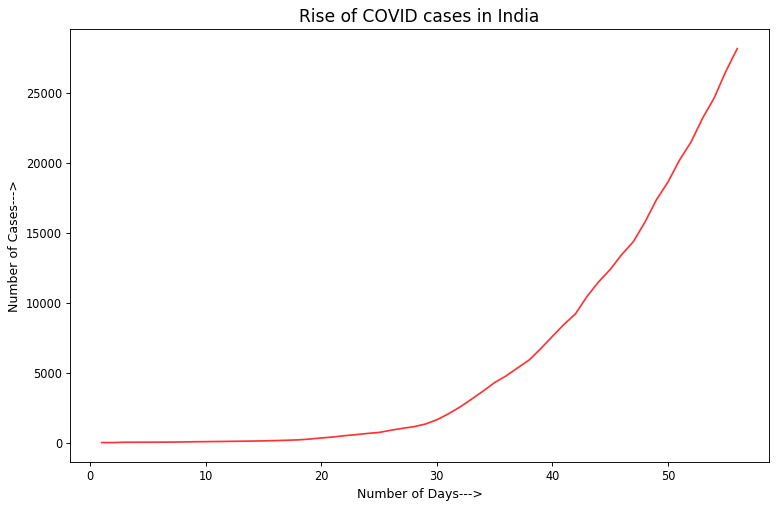

In [20]:
individuals_grouped_date = individuals_grouped_date.iloc[3:]
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date.columns = ['Day Number', 'diagnosed_date', 'count', 'Cumulative Count']
individuals_grouped_date['Day Number'] = individuals_grouped_date['Day Number'] - 2
individuals_grouped_date

plt.figure(figsize=(11,7), dpi=82)
plt.plot(individuals_grouped_date['Day Number'], individuals_grouped_date['Cumulative Count'], color="red", alpha = 0.8)
plt.xlabel('Number of Days--->', size = 11)
plt.ylabel('Number of Cases--->', size = 11)
plt.title('Rise of COVID cases in India', size=15)
plt.show()

### Curve shows that the rise was less steeper till the first 20 days . In the interval between 20-30, the curve inclined a bit. This  gradually became steeper with no signs of flattening.

### Now we will process the dataset to group the data in terms of different states. Following states will be used for the analysis:

1. Maharashtra
2. Kerala
3. Delhi
4. Rajasthan
5. Gujarat
6. Tripura

### 1.Maharashtra : 

In [21]:
covid19_maharashtra = covid19_df[covid19_df['State/UnionTerritory'] == "Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra = covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                           "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                           "State/UnionTerritory": ["Maharashtra"]*7,
                           "Deaths": [0]*7,
                           "Confirmed": [0]*7})
covid19_maharashtra = covid19_maharashtra.append(missing_values, ignore_index = True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)
covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(93, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Maharashtra,0,0
1,2,03/03/20,Maharashtra,0,0
2,3,04/03/20,Maharashtra,0,0
3,4,05/03/20,Maharashtra,0,0
4,5,06/03/20,Maharashtra,0,0


### 2.Kerala:

In [22]:
covid19_kerala = covid19_df[covid19_df['State/UnionTerritory'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(93, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


### 3.Delhi:

In [23]:
covid19_delhi = covid19_df[covid19_df['State/UnionTerritory'] == "Delhi"]
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(93, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


### 4.Rajasthan:

In [24]:
covid19_rajasthan = covid19_df[covid19_df['State/UnionTerritory'] == "Rajasthan"]
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan = covid19_rajasthan.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_rajasthan['Day Count'] = covid19_rajasthan['Day Count'] + 2
missing_values = pd.DataFrame({"Day Count": [1],
                           "Date": ["02/03/20"],
                           "State/UnionTerritory": ["Rajasthan"],
                           "Deaths": [0],
                           "Confirmed": [0]})
covid19_rajasthan = covid19_rajasthan.append(missing_values, ignore_index = True)
covid19_rajasthan = covid19_rajasthan.sort_values(by="Day Count", ascending = True)
covid19_rajasthan.reset_index(drop=True, inplace=True)
print(covid19_rajasthan.shape)
covid19_rajasthan.head()

(93, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Rajasthan,0,0
1,2,03/03/20,Rajasthan,0,1
2,3,04/03/20,Rajasthan,0,15
3,4,05/03/20,Rajasthan,0,15
4,5,06/03/20,Rajasthan,0,15


### 5.Gujarat:

In [26]:
covid19_gujarat = covid19_df[covid19_df['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

(93, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


### 6. Tripura:

In [28]:
covid19_tripura = covid19_df[covid19_df['State/UnionTerritory'] == "Tripura"]
covid19_tripura.reset_index(inplace = True)
covid19_tripura = covid19_tripura.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_tripura.reset_index(inplace = True)
covid19_tripura.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_tripura['Day Count'] = covid19_tripura['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Tripura"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_tripura = covid19_tripura.append(missing_values, ignore_index = True)
covid19_tripura = covid19_tripura.sort_values(by="Day Count", ascending = True)
covid19_tripura.reset_index(drop=True, inplace=True)
print(covid19_tripura.shape)
covid19_tripura.head()

(75, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Tripura,0,0
1,2,03/03/20,Tripura,0,0
2,3,04/03/20,Tripura,0,0
3,4,05/03/20,Tripura,0,0
4,5,06/03/20,Tripura,0,0


In [29]:
covid19_tripura.tail()

,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
70,71,29/05/20,Tripura,0,242
71,72,30/05/20,Tripura,0,251
72,73,31/05/20,Tripura,0,268
73,74,01/06/20,Tripura,0,313
74,75,02/06/20,Tripura,0,420


### Let's now visualize the curve 

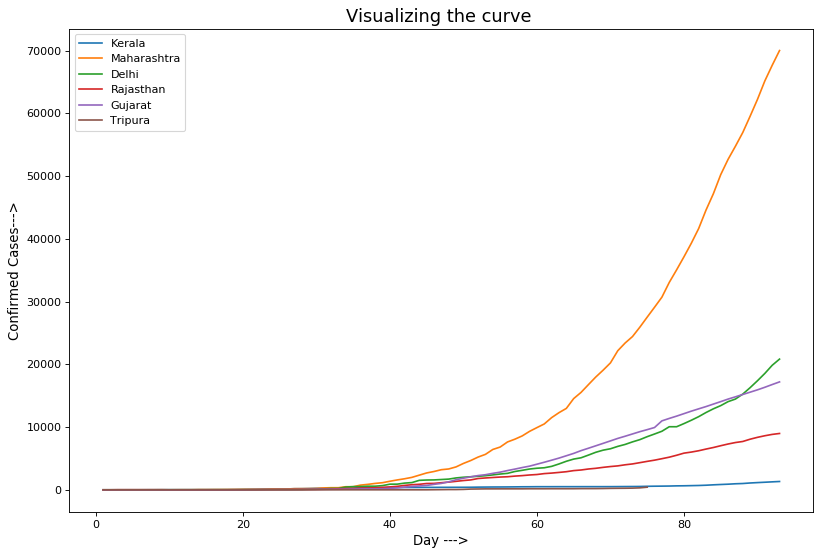

In [30]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_rajasthan['Day Count'], covid19_rajasthan['Confirmed'])
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'])
plt.plot(covid19_tripura['Day Count'], covid19_tripura['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Rajasthan', 'Gujarat','Tripura'], loc='upper left')
plt.xlabel('Day --->', size=12)
plt.ylabel('Confirmed Cases--->', size=12)
plt.title('Visualizing the curve ', size = 16)
plt.show()

### We can see all the curves shows a rise in the number of COVID cases. But the only anomaly is that of Kerala and Tripura. Kerala's curve shows gradual rise in the period between 20-30 days. But Kerala managed to not let the curve rise further and managed to flatten the curve.

### Tripura has a similar curve like Kerala.

### The situation in Maharashtra looks worse. The curve is rising very steadily.

### The only way to prevent this situation is by flattening the curve. 

### This was an analysis of the current COVID situation across India. 

## "Stay Home Stay Safe"

### There’s still a lot we do not know about the trajectory of the pandemic in India, and this is a good time to revisit these.

One,no idea why the death rate in India, 2.8% on Monday, is much lower than the global 6%. Is it because the virus affects Indians differently? Is it because the BCG vaccine, almost universally given to children in India (for decades) helps Indians infected by the Sars-CoV-2 virus deal with it better? We don’t know. Nor do we know why the proportion of those needing critical care or ventilator support is lower in India than what it was in Italy and the US, two countries ravaged by the disease.

Two, we have no idea what the actual death rate in India is. That’s because we are likely underestimating the number of cases. Positivity rates – the number of people testing positive to those tested – continue to rise across most states, including hot spots such as Tamil Nadu, Maharashtra and Delhi, which together account for around 57-58% of all cases in India, and 61% of active cases. Across the world, positivity rates continue to increase up to a point as the number of tests increase, then plateau, and finally start dipping. India is yet to reach that stage – indicating that we are still not testing enough, but this will only serve to reduce the death rate further. Indeed, while we do not know what the actual death rate is, we do know that it is probably lower than 2.8% (because we are underestimating cases).

Three, are we also underestimating the number of deaths in India? After all, studies by the New York Times and the Financial Times have shown that many countries are, and significantly. The fragmented data available says we are not – there is no spike in the number of non-Covid deaths in March and April – but it makes sense to wait till we can get more comprehensive data. That’s another question to which the best answer would be: we don’t know.

Four, we do not know how many Indians have been infected by the virus – and are therefore immune to it. There have been no widespread serological (blood) antibody tests that can provide this information.

Five, we have no idea why the virus affects different geographies differently. For instance, Bengaluru is one of India’s most connected cities; it is home to tens of thousands of migrants from other states (and even other countries), yet it has a fraction of the cases that Delhi or Mumbai have.

It is important we find answers to at least some of these — they will help us deal better with the coming peak.

# a DataScience Project  by Krishanu Podder (https://www.linkedin.com/in/krishanu-podder-905a9a89/)